# **CNN Mnist with STM32Cube.AI**

현재 경로와 Keras 버전 확인하기

In [1]:
import os
import keras

current_directory = os.getcwd()
print("Current Directory Path : {}".format(current_directory))

current_version = keras.__version__
print("Current Keras Version : {}".format(current_version))

Current Directory Path : /content
Current Keras Version : 2.12.0


Keras 버전 변경하기

In [2]:
# STM32Cube.AI에서 지원하는 Keras Version으로 변겯하기.
!pip install keras==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.11.0 which is incompatible.


라이브러리Import하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

Mnist 데이터 불러오기

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train shape = {} , y_train shape = {}".format(np.shape(x_train), np.shape(y_train)))
print("x_test shape = {}, y_test shape = {}".format(np.shape(x_test),np.shape(y_test)))


11490434/11490434 [==============================] - 0s 0us/step
x_train shape = (60000, 28, 28) , y_train shape = (60000,)
x_test shape = (10000, 28, 28), y_test shape = (10000,)


Mnist 이미지 그려보기

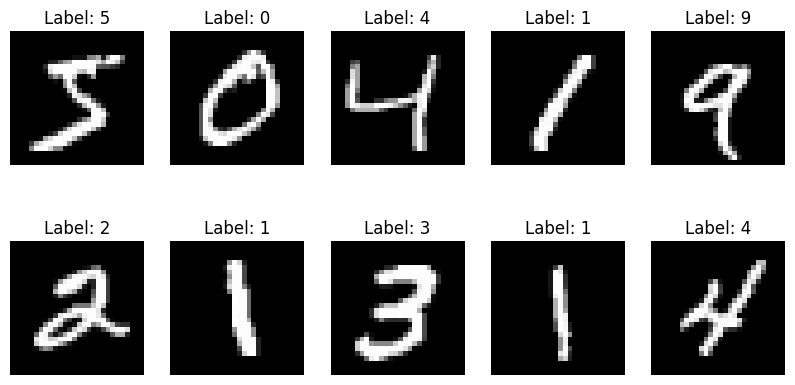

In [3]:
# Function to draw the images
def draw_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(10):  # Display the first 10 images
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title("Label: " + str(labels[i]))
        plt.axis('off')
    plt.show()

draw_images(x_train,y_train)

Normalization과 0 ~ 9 의 Class를 One hot vector로 변경하기

In [4]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train[0].shape)
print(type(x_train[0]))
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (28, 28, 1)
<class 'numpy.ndarray'>
60000 train samples
10000 test samples


Model 구성하기

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Model 학습 진행하기

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# 학습된 모델을 .h5 파일로 저장
model.save("cnn_mnist.h5")

Epoch 1/15
422/422 [==============================] - 49s 114ms/step - loss: 0.3699 - accuracy: 0.8902 - val_loss: 0.0891 - val_accuracy: 0.9753
Epoch 2/15
422/422 [==============================] - 46s 108ms/step - loss: 0.1142 - accuracy: 0.9647 - val_loss: 0.0612 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 50s 119ms/step - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0491 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0744 - accuracy: 0.9771 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0648 - accuracy: 0.9797 - val_loss: 0.0402 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 7/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0382 - val_ac

Model 평가하기

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0283073578029871
Test accuracy: 0.9898999929428101


In [8]:
# 모델의 첫 번째 레이어를 가져옵니다.
first_layer = model.layers[0]

# 첫 번째 레이어의 Input shape을 확인합니다.
input_shape = first_layer.input_shape
print("Input shape:", input_shape)

Input shape: (None, 28, 28, 1)


새로운 이미지를 Model에 적용하기

In [9]:
from PIL import Image

def load_8bit_bmp(file_path):
    try:
        # BMP 파일 열기
        with Image.open(file_path) as img:
            # 이미지가 8비트 모드인지 확인
            #if img.mode != 'P':
               # raise ValueError("이미지가 8비트 형식이 아닙니다.")

            # 픽셀 데이터 가져오기
            pixel_data = list(img.getdata())

            # 이미지 크기
            width, height = img.size

            # 픽셀 데이터를 2차원 리스트로 변환
            pixel_matrix = [pixel_data[i:i+width] for i in range(0, len(pixel_data), width)]

            return pixel_matrix

    except Exception as e:
        print("오류 발생:", str(e))
        return None

pixel_matrix = load_8bit_bmp("_4.bmp")
pixel_matrix2 = np.array(pixel_matrix, dtype=np.float32)
pixel_matrix2 /= 255.0

pixel_matrix2 = pixel_matrix2.reshape(1,28,28,1)
print(type(pixel_matrix2))
print(np.shape(pixel_matrix2))

<class 'numpy.ndarray'>
(1, 28, 28, 1)


In [12]:
from keras.models import load_model
import tensorflow as tf

# Load the pre-trained model
model = load_model('cnn_mnist.h5')  # Replace 'path_to_saved_model.h5' with the actual path to your saved model.

print(x_train[0].shape)
predictions = model.predict(pixel_matrix2)
predicted_classes = np.argmax(predictions, axis=1)

print(predictions)
print("Hand write number is :", predicted_classes)

# Decode the numeric predictions back to original class labels
#predicted_labels = encoder.inverse_transform(predicted_classes)


(28, 28, 1)
1/1 [==============================] - 0s 258ms/step
[[1.6141849e-04 1.8449933e-03 2.0540561e-05 5.3256588e-10 9.9796778e-01
  1.1585505e-08 4.3334194e-06 5.1999569e-07 1.3522279e-10 4.1533494e-07]]
Hand write number is : [4]
